### Step 1 - Examine Dataset

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [151]:
data_df = pd.read_excel('./flight_price_prediction_raw_dataset.xlsx')
fleet_headcount = pd.read_excel('./fleet_headcount.xlsx')



Examine the dataset

In [153]:
data_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [154]:
fleet_headcount.head()

,airline,Staff,Fleet,Airbus A320-200,Airbus A320neo,Airbus A321neo,Boeing 737-800,Boeing 777-200/300,Boeing 787 Dreamliner,Boeing 737 MAX,Bombardier Q400,ATR 72-500/600
0,IndiGo,23000,195.0,80.0,100.0,15.0,0,0,0.0,0,0.0,0
1,Air India,19000,150.0,60.0,25.0,0.0,20,30,15.0,0,0.0,0
2,Jet Airways,16500,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
3,Jet Airways Business,16500,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
4,SpiceJet,14500,82.0,0.0,0.0,0.0,50,0,0.0,20,12.0,0


In [155]:
data_df.columns = data_df.columns.str.lower()
fleet_headcount.columns = fleet_headcount.columns.str.lower()

In [156]:
# merge dataset with additional info
train_df=pd.merge(data_df,fleet_headcount, on='airline', how='left')

In [157]:
train_df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,...,fleet,airbus a320-200,airbus a320neo,airbus a321neo,boeing 737-800,boeing 777-200/300,boeing 787 dreamliner,boeing 737 max,bombardier q400,atr 72-500/600
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,195.0,80.0,100.0,15.0,0,0,0.0,0,0.0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,150.0,60.0,25.0,0.0,20,30,15.0,0,0.0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,195.0,80.0,100.0,15.0,0,0,0.0,0,0.0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,195.0,80.0,100.0,15.0,0,0,0.0,0,0.0,0


In [158]:
train_df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price', 'staff', 'fleet', 'airbus a320-200',
       'airbus a320neo', 'airbus a321neo', 'boeing 737-800',
       'boeing 777-200/300', 'boeing 787 dreamliner', 'boeing 737 max',
       'bombardier q400', 'atr 72-500/600'],
      dtype='object')

In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   airline                10683 non-null  object 
 1   date_of_journey        10683 non-null  object 
 2   source                 10683 non-null  object 
 3   destination            10683 non-null  object 
 4   route                  10682 non-null  object 
 5   dep_time               10683 non-null  object 
 6   arrival_time           10683 non-null  object 
 7   duration               10683 non-null  object 
 8   total_stops            10682 non-null  object 
 9   additional_info        10683 non-null  object 
 10  price                  10683 non-null  int64  
 11  staff                  10683 non-null  int64  
 12  fleet                  10683 non-null  float64
 13  airbus a320-200        10683 non-null  float64
 14  airbus a320neo         10683 non-null  float64
 15  ai

### Step 2 - Cleaning Data

In [161]:
#Check null values and cleaning up null values
train_df.isnull().sum()[train_df.isnull().sum() > 0]

route          1
total_stops    1
dtype: int64

In [162]:
train_df[train_df['route'].isnull()]

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,...,fleet,airbus a320-200,airbus a320neo,airbus a321neo,boeing 737-800,boeing 777-200/300,boeing 787 dreamliner,boeing 737 max,bombardier q400,atr 72-500/600
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,...,150.0,60.0,25.0,0.0,20,30,15.0,0,0.0,0


In [163]:
train_df[train_df['total_stops'].isnull()]

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,...,fleet,airbus a320-200,airbus a320neo,airbus a321neo,boeing 737-800,boeing 777-200/300,boeing 787 dreamliner,boeing 737 max,bombardier q400,atr 72-500/600
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,...,150.0,60.0,25.0,0.0,20,30,15.0,0,0.0,0


In [164]:
train_df.dropna(subset = ['route'], inplace = True)

In [165]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

In [166]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   airline                10682 non-null  object 
 1   date_of_journey        10682 non-null  object 
 2   source                 10682 non-null  object 
 3   destination            10682 non-null  object 
 4   route                  10682 non-null  object 
 5   dep_time               10682 non-null  object 
 6   arrival_time           10682 non-null  object 
 7   duration               10682 non-null  object 
 8   total_stops            10682 non-null  object 
 9   additional_info        10682 non-null  object 
 10  price                  10682 non-null  int64  
 11  staff                  10682 non-null  int64  
 12  fleet                  10682 non-null  float64
 13  airbus a320-200        10682 non-null  float64
 14  airbus a320neo         10682 non-null  float64
 15  airbus 

In [167]:
#format data to the correct format
train_df['date_of_journey'] = pd.to_datetime(train_df['date_of_journey'])

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\181227509.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [168]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   airline                10682 non-null  object        
 1   date_of_journey        10682 non-null  datetime64[ns]
 2   source                 10682 non-null  object        
 3   destination            10682 non-null  object        
 4   route                  10682 non-null  object        
 5   dep_time               10682 non-null  object        
 6   arrival_time           10682 non-null  object        
 7   duration               10682 non-null  object        
 8   total_stops            10682 non-null  object        
 9   additional_info        10682 non-null  object        
 10  price                  10682 non-null  int64         
 11  staff                  10682 non-null  int64         
 12  fleet                  10682 non-null  float64       
 13  airbus

In [169]:
train_df[['date_of_journey']].describe()

,date_of_journey
count,10682
mean,2019-05-04 19:56:32.398427392
min,2019-03-01 00:00:00
25%,2019-03-27 00:00:00
50%,2019-05-15 00:00:00
75%,2019-06-06 00:00:00
max,2019-06-27 00:00:00


In [170]:
train_df[train_df['additional_info'] == 'Business class']

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,...,fleet,airbus a320-200,airbus a320neo,airbus a321neo,boeing 737-800,boeing 777-200/300,boeing 787 dreamliner,boeing 737 max,bombardier q400,atr 72-500/600
2924,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
3032,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
5372,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0


In [171]:
# standardize the names in airline column
train_df.loc[3032, 'airline'] = 'Jet Airways Business'


In [172]:
train_df[train_df['additional_info'] == 'Business class']

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,...,fleet,airbus a320-200,airbus a320neo,airbus a321neo,boeing 737-800,boeing 777-200/300,boeing 787 dreamliner,boeing 737 max,bombardier q400,atr 72-500/600
2924,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
3032,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
5372,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,...,80.0,40.0,10.0,0.0,15,10,5.0,0,0.0,0


In [173]:
# check for duplication in train data

train_df.duplicated().sum()

220

In [174]:
# drop duplication in train data
train_df.drop_duplicates(inplace=True)

### Step 3 - Adding in more features

In [176]:
train_df['month'] = pd.to_datetime(train_df['date_of_journey']).dt.month
train_df['day'] = pd.to_datetime(train_df['date_of_journey']).dt.day
train_df

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,...,airbus a320neo,airbus a321neo,boeing 737-800,boeing 777-200/300,boeing 787 dreamliner,boeing 737 max,bombardier q400,atr 72-500/600,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,100.0,15.0,0,0,0.0,0,0.0,0,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,25.0,0.0,20,30,15.0,0,0.0,0,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,10.0,0.0,15,10,5.0,0,0.0,0,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,100.0,15.0,0,0,0.0,0,0.0,0,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,100.0,15.0,0,0,0.0,0,0.0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,...,12.0,0.0,0,0,0.0,0,0.0,0,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,...,25.0,0.0,20,30,15.0,0,0.0,0,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,...,10.0,0.0,15,10,5.0,0,0.0,0,4,27
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,...,10.0,10.0,0,0,0.0,0,0.0,0,3,1


In [177]:
train_df['airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [178]:
train_df['additional_info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [179]:
# add days left

train_df['today'] = '2019-02-28'
train_df['today'] = pd.to_datetime(train_df['today'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   airline                10462 non-null  object        
 1   date_of_journey        10462 non-null  datetime64[ns]
 2   source                 10462 non-null  object        
 3   destination            10462 non-null  object        
 4   route                  10462 non-null  object        
 5   dep_time               10462 non-null  object        
 6   arrival_time           10462 non-null  object        
 7   duration               10462 non-null  object        
 8   total_stops            10462 non-null  object        
 9   additional_info        10462 non-null  object        
 10  price                  10462 non-null  int64         
 11  staff                  10462 non-null  int64         
 12  fleet                  10462 non-null  float64       
 13  airbus

In [180]:
train_df['days_left'] = train_df['date_of_journey'] - train_df['today'] 
train_df['days_left']

0        24 days
1        62 days
2       101 days
3        73 days
4         1 days
          ...   
10678    40 days
10679    58 days
10680    58 days
10681     1 days
10682    70 days
Name: days_left, Length: 10462, dtype: timedelta64[ns]

In [181]:
# Adding skytrax rating

def skytrax_categorization(row):
    if row['airline'] in ['Vistara', 'Vistara Premium economy', 'Indigo']:
        return "4"
    else:
        return "3"

train_df['skytrax_rating'] = train_df.apply(skytrax_categorization, axis=1)

In [182]:
# inflight meals: Air India, Vistara,  'Vistara Premium economy', 'Jet Airways Business','Multiple carriers Premium economy'

def inflight_meal_categorization(row):
    if row['airline'] in ['Air India', 'Vistara',  'Vistara Premium economy', 'Jet Airways Business','Multiple carriers Premium economy']:
        return "1"
    else:
        return "0"

train_df['inflight_meal'] = train_df.apply(inflight_meal_categorization, axis=1)

In [183]:
train_df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price', 'staff', 'fleet', 'airbus a320-200',
       'airbus a320neo', 'airbus a321neo', 'boeing 737-800',
       'boeing 777-200/300', 'boeing 787 dreamliner', 'boeing 737 max',
       'bombardier q400', 'atr 72-500/600', 'month', 'day', 'today',
       'days_left', 'skytrax_rating', 'inflight_meal'],
      dtype='object')

In [184]:
#check in luggage: 'IndiGo', 'Air India', 'SpiceJet',Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy'
#Vistara,  'Vistara Premium economy'

def checked_in_categorization(row):
    if row['airline'] in ['IndiGo','Air India','SpiceJet','Vistara Premium economy','Jet Airways Business', \
                          'Multiple carriers Premium economy','Vistara',  'Vistara Premium economy']:
        return "1"
    else:
        return "0"

train_df['checked_in_luggage'] = train_df.apply(checked_in_categorization, axis=1)

In [185]:
train_df['arrival_hour'] = pd.to_datetime(train_df['arrival_time']).dt.hour

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\1404538805.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [186]:
#time categorization

def arr_session_categorization(row):
    if row['arrival_hour'] < 5:
        return "dawn"
    elif row['arrival_hour'] < 12:
        return "morning"
    elif row['arrival_hour'] < 18:
        return "afternoon"
    else:
        return "night"

train_df['arrival_session'] = train_df.apply(arr_session_categorization, axis=1)

In [187]:
train_df['dep_hour'] = pd.to_datetime(train_df['dep_time']).dt.hour

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\3752795057.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [188]:
def session_categorization(row):
    if row['dep_hour'] < 5:
        return "dawn"
    elif row['dep_hour'] < 12:
        return "morning"
    elif row['dep_hour'] < 18:
        return "afternoon"
    else:
        return "night"

train_df['dep_session'] = train_df.apply(session_categorization, axis=1)

In [189]:
train_df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,...,day,today,days_left,skytrax_rating,inflight_meal,checked_in_luggage,arrival_hour,arrival_session,dep_hour,dep_session
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,2019-02-28,24 days,3,0,1,1,dawn,22,night
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,2019-02-28,62 days,3,1,1,13,afternoon,5,morning
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,2019-02-28,101 days,3,0,0,4,dawn,9,morning
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,12,2019-02-28,73 days,3,0,1,23,night,18,night
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,2019-02-28,1 days,3,0,1,21,night,16,afternoon


In [190]:
train_df['day_of_week'] = pd.to_datetime(train_df['date_of_journey']).dt.dayofweek

In [191]:
train_df['price_usd'] = train_df['price']*0.012
train_df['price_usd'] = train_df['price_usd'].astype(int)

In [192]:
from datetime import datetime

In [193]:
train_df['duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: duration, Length: 10462, dtype: object

In [194]:
train_df = train_df.drop([6474])

In [195]:
train_df[train_df['duration'] == '5m']

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,...,days_left,skytrax_rating,inflight_meal,checked_in_luggage,arrival_hour,arrival_session,dep_hour,dep_session,day_of_week,price_usd


In [196]:
train_df[['duration_hours', 'duration_minutes']] = train_df['duration'].str.split("h", expand=True)
train_df['duration_hours'] = train_df['duration_hours'].astype(int)

In [197]:
train_df['duration_minutes'] = pd.to_numeric(train_df['duration_minutes'].str.replace('m', ''), errors='coerce').fillna(0).astype(int)
train_df['duration_in_hours'] = train_df['duration_hours'] + (train_df['duration_minutes'] / 60)
train_df['duration_in_hours'] = train_df['duration_in_hours'].round(1)

In [198]:
train_df['duration_in_hours']

0         2.8
1         7.4
2        19.0
3         5.4
4         4.8
         ... 
10678     2.5
10679     2.6
10680     3.0
10681     2.7
10682     8.3
Name: duration_in_hours, Length: 10461, dtype: float64

In [199]:
# train_df['duration'] = train_df['duration'].replace('h', 'hours').replace('m', 'minutes')
# train_df['duration'] = pd.to_timedelta(train_df['duration'])

In [200]:
# # Function to extract hours and minutes
# def duration_minutes(td):
#     hours = (td.seconds // 3600) * 60
#     minutes = (td.seconds % 3600) // 60
#     return hours + minutes

# # Apply the function to the 'time' column
# train_df['duration_minutes'] = train_df['duration'].apply(duration_minutes)

In [201]:
train_df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price', 'staff', 'fleet', 'airbus a320-200',
       'airbus a320neo', 'airbus a321neo', 'boeing 737-800',
       'boeing 777-200/300', 'boeing 787 dreamliner', 'boeing 737 max',
       'bombardier q400', 'atr 72-500/600', 'month', 'day', 'today',
       'days_left', 'skytrax_rating', 'inflight_meal', 'checked_in_luggage',
       'arrival_hour', 'arrival_session', 'dep_hour', 'dep_session',
       'day_of_week', 'price_usd', 'duration_hours', 'duration_minutes',
       'duration_in_hours'],
      dtype='object')

In [202]:
train_df = train_df.drop(['dep_time', 'arrival_time','duration','additional_info', 'price','today','dep_hour','duration_hours','duration_minutes','arrival_hour'], axis=1)

In [203]:
train_df['skytrax_rating']=train_df['skytrax_rating'].astype(int)
train_df['inflight_meal']=train_df['inflight_meal'].astype(int)
train_df['checked_in_luggage']=train_df['checked_in_luggage'].astype(int)
train_df['days_left']=train_df['days_left'].dt.days

In [204]:
final_df = train_df[(train_df['airline'] != 'Jet Airways Business') & (train_df['airline'] != 'Vistara Premium economy') & (train_df['airline'] != 'Multiple carriers Premium economy')]
# | (train_df['airline'] != 'Vistara Premium economy')\
# | (train_df['airline'] != 'Multiple carriers Premium economy')]

In [205]:
final_df[final_df['airline'] == 'Vistara Premium economy']

,airline,date_of_journey,source,destination,route,total_stops,staff,fleet,airbus a320-200,airbus a320neo,...,day,days_left,skytrax_rating,inflight_meal,checked_in_luggage,arrival_session,dep_session,day_of_week,price_usd,duration_in_hours


In [206]:
final_df[final_df['airline'] == 'Jet Airways Business']

,airline,date_of_journey,source,destination,route,total_stops,staff,fleet,airbus a320-200,airbus a320neo,...,day,days_left,skytrax_rating,inflight_meal,checked_in_luggage,arrival_session,dep_session,day_of_week,price_usd,duration_in_hours


In [207]:
final_df.replace(to_replace='non-stop', value=0, inplace=True)
final_df.replace(to_replace='1 stop', value=1, inplace=True)
final_df.replace(to_replace='2 stops', value=2, inplace=True)
final_df.replace(to_replace='3 stops', value=3, inplace=True)
final_df.replace(to_replace='4 stops', value=4, inplace=True)

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\783381502.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\783381502.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\783381502.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\783381502.py:4: SettingWithCopyWarning:


A value is tryi

In [208]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10438 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   airline                10438 non-null  object        
 1   date_of_journey        10438 non-null  datetime64[ns]
 2   source                 10438 non-null  object        
 3   destination            10438 non-null  object        
 4   route                  10438 non-null  object        
 5   total_stops            10438 non-null  int64         
 6   staff                  10438 non-null  int64         
 7   fleet                  10438 non-null  float64       
 8   airbus a320-200        10438 non-null  float64       
 9   airbus a320neo         10438 non-null  float64       
 10  airbus a321neo         10438 non-null  float64       
 11  boeing 737-800         10438 non-null  int64         
 12  boeing 777-200/300     10438 non-null  int64         
 13  boeing

In [209]:
final_df.to_csv('flight_price_prediction_clean_dataset.csv')

### Step 4 - Plotting Graphs

In [211]:
#price_USD  vs source
#price_USD  vs destination
#price_USD  vs route
#price_USD  vs total stops
#price_USD  vs duration_minutes
#price_USD  vs dep_session
#price_USD  vs days_left
#price_USD  vs day_of_week
#price_USD  vs month

In [212]:
import numpy as np
import seaborn as sns

In [213]:
final_df['airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [214]:
final_df['price_usd'].describe()

count    10438.000000
mean       107.435907
std         53.534250
min         21.000000
25%         62.000000
50%         99.000000
75%        147.000000
max        657.000000
Name: price_usd, dtype: float64

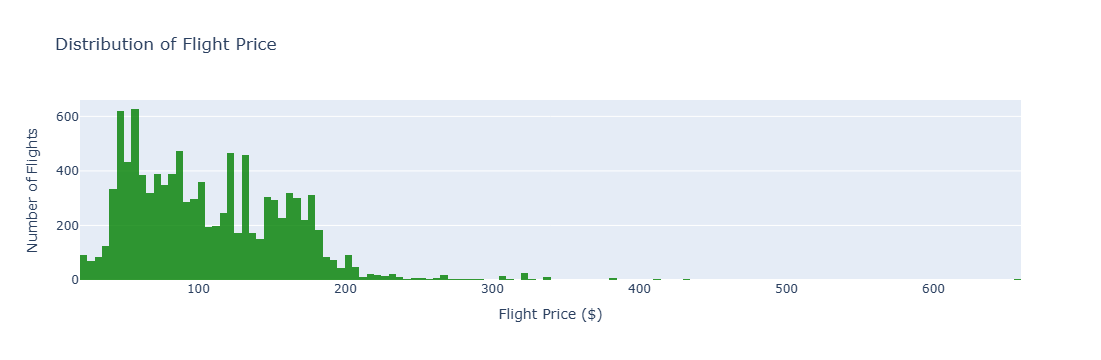

In [215]:
# Histogram for Flight Price
import plotly.express as px
fig = px.histogram(final_df, x="price_usd",
                   title='Distribution of Flight Price',
                   opacity=0.8,
                   color_discrete_sequence=['green']
                   )

fig.update_layout(
    xaxis_title='Flight Price ($)',  # x-axis label
    yaxis_title='Number of Flights'      # y-axis label
)


fig.show()


Text(0.5, 1.0, 'Distribution of Flight Prices')

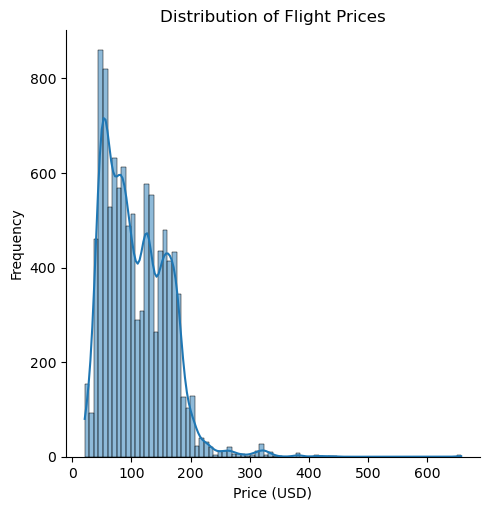

In [216]:
sns.displot(data=final_df, x="price_usd", kde=True)

plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Flight Prices")

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\536716815.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\536716815.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



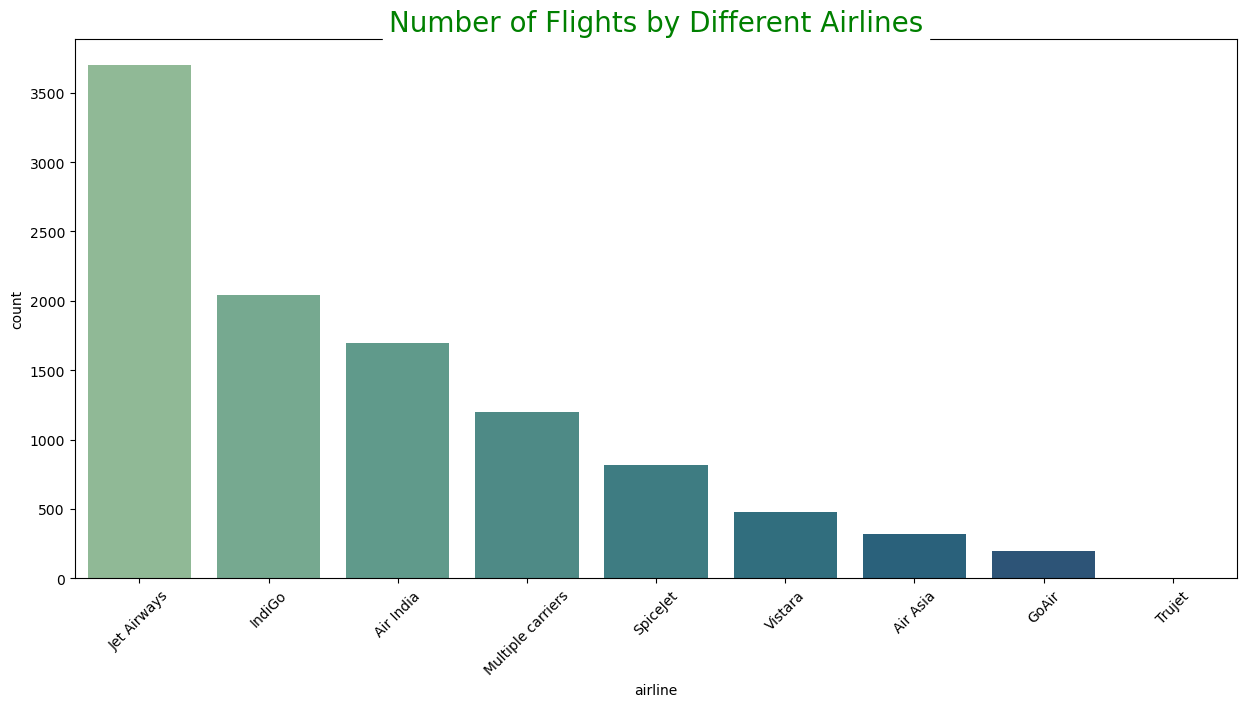

In [217]:
plt.figure(figsize=(15,7))
chart=sns.countplot(x='airline',data=final_df,palette='crest', order = final_df['airline'].value_counts().index)
plt.title("Number of Flights by Different Airlines",
          fontsize='20',
          backgroundcolor='white',
          color='green')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45);

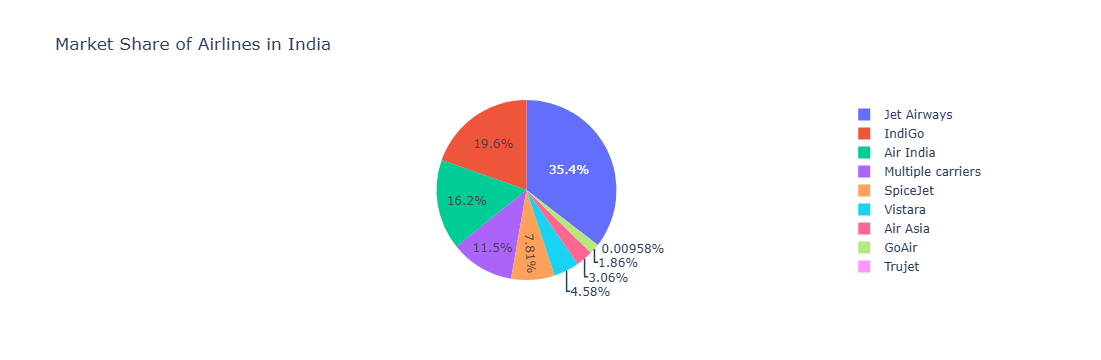

In [218]:
groupby_airline = final_df['airline'].value_counts().reset_index()

groupby_airline
fig = px.pie(groupby_airline, values='count', names='airline', title='Market Share of Airlines in India')
fig.show()

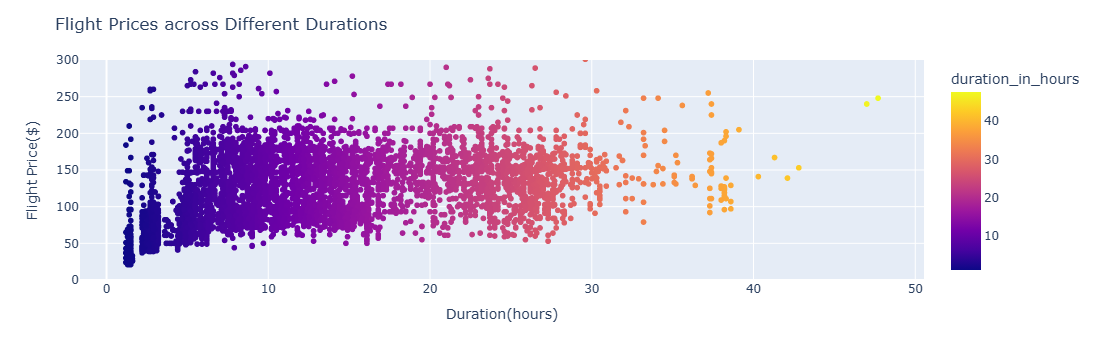

In [219]:
# Flight Prices across Different Durations
fig = px.scatter(final_df, x="duration_in_hours", y="price_usd", color="duration_in_hours")

fig.update_layout(
    title='Flight Prices across Different Durations',
    xaxis_title='Duration(hours)',  # x-axis label
    yaxis_title='Flight Price($)',      # y-axis label
    yaxis=dict(
    range=[0, 300]
))


fig.show()

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8620\1482222740.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




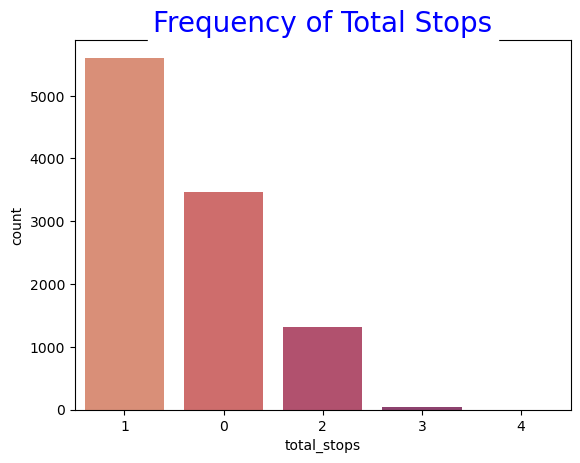

In [220]:
sns.countplot(x='total_stops',data=final_df, palette='flare', order = final_df['total_stops'].value_counts().index)
plt.title("Frequency of Total Stops",
          fontsize='20',
          backgroundcolor='white',
          color='blue');

In [221]:
final_df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'total_stops', 'staff', 'fleet', 'airbus a320-200', 'airbus a320neo',
       'airbus a321neo', 'boeing 737-800', 'boeing 777-200/300',
       'boeing 787 dreamliner', 'boeing 737 max', 'bombardier q400',
       'atr 72-500/600', 'month', 'day', 'days_left', 'skytrax_rating',
       'inflight_meal', 'checked_in_luggage', 'arrival_session', 'dep_session',
       'day_of_week', 'price_usd', 'duration_in_hours'],
      dtype='object')

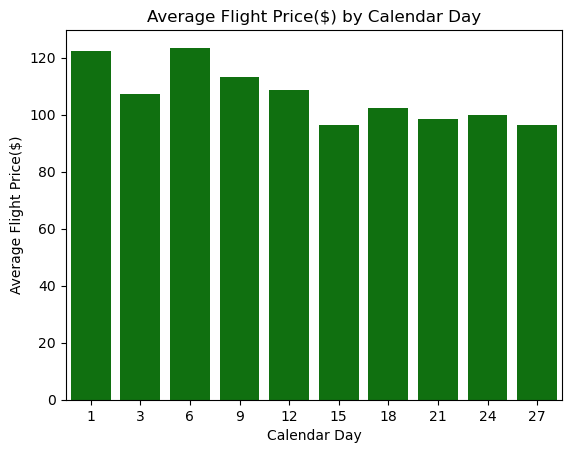

In [222]:
# Flight prices across different day 

price_groupby_day = final_df.groupby('day', as_index=False)['price_usd'].mean()

sns.barplot(x='day', y='price_usd', data=price_groupby_day, color='green')

# Adding labels and title
plt.xlabel("Calendar Day")  # Label for the x-axis
plt.ylabel("Average Flight Price($)")  # Label for the y-axis
plt.title("Average Flight Price($) by Calendar Day")  # Title of the plot

# Display the plot
plt.show()

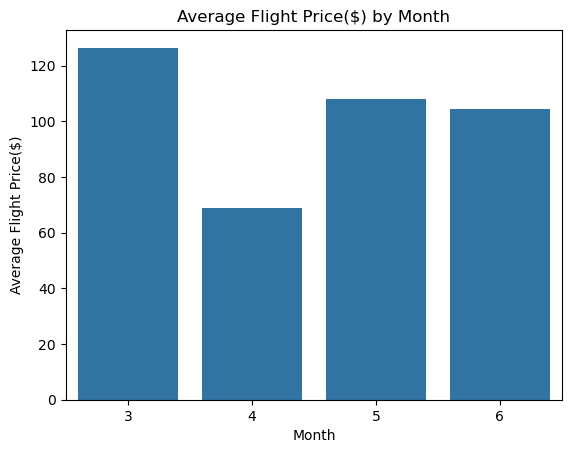

In [223]:
# Flight prices across different month 

price_groupby_month = final_df.groupby('month', as_index=False)['price_usd'].mean()

sns.barplot(x='month', y='price_usd', data=price_groupby_month)

# Adding labels and title
plt.xlabel("Month")  # Label for the x-axis
plt.ylabel("Average Flight Price($)")  # Label for the y-axis
plt.title("Average Flight Price($) by Month")  # Title of the plot

# Display the plot
plt.show()

In [224]:
# Flight prices across different day of week

price_groupby_dayofweek = final_df.groupby('day_of_week', as_index=False)['price_usd'].mean()

price_groupby_dayofweek


,day_of_week,price_usd
0,0,100.353625
1,1,106.840563
2,2,110.061095
3,3,105.315162
4,4,112.946785
5,5,106.077682
6,6,113.587422


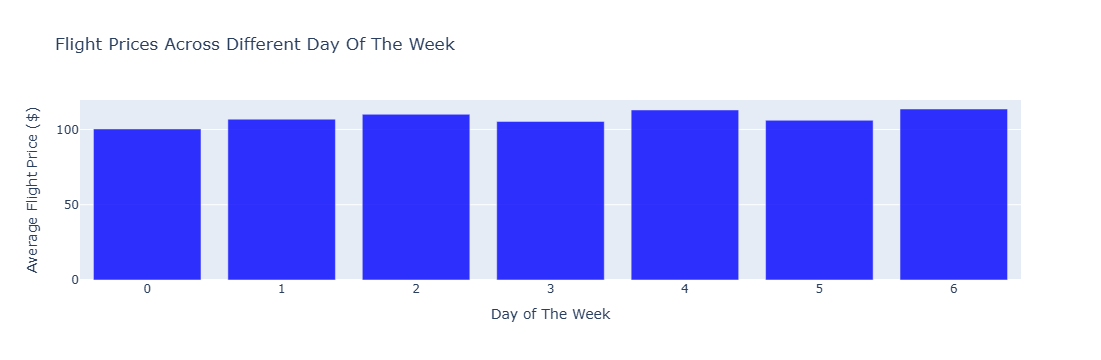

In [225]:
# Flight prices across different day of week

fig = px.bar(price_groupby_dayofweek, x="day_of_week", y="price_usd", 
                   title='Flight Prices Across Different Day Of The Week',
                   opacity=0.8,
                   color_discrete_sequence=['blue']
                   )
fig.update_layout(
    xaxis_title='Day of The Week',  # x-axis label
    yaxis_title='Average Flight Price ($)'      # y-axis label
)


fig.show()

In [226]:
# Flight prices across different days left

price_groupby_daysleft = final_df.groupby('days_left', as_index=False)['price_usd'].mean()

price_groupby_daysleft.head()

,days_left,price_usd
0,1,223.078125
1,3,143.325733
2,6,165.908861
3,9,124.454849
4,12,138.680851


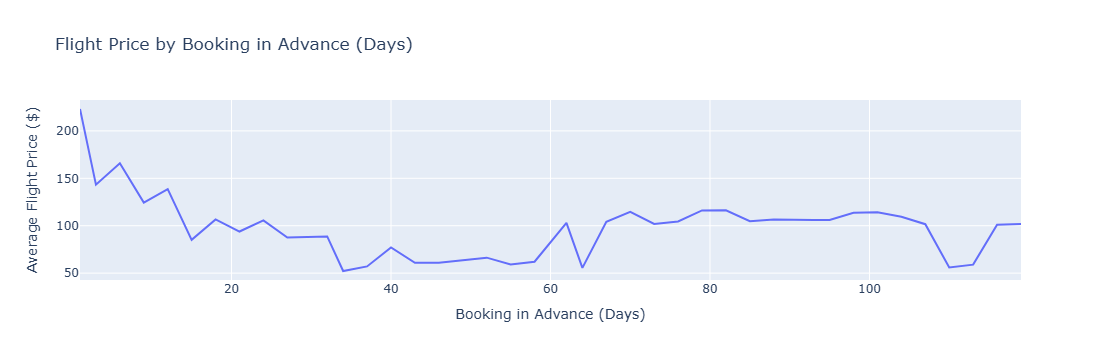

In [227]:
# Flight prices across different days left in line plot

fig = px.line(price_groupby_daysleft, x="days_left", y="price_usd", title='Flight Price by Booking in Advance (Days)')

# Add labels for x and y axes
fig.update_layout(
    xaxis_title="Booking in Advance (Days)",   # Label for the x-axis
    yaxis_title="Average Flight Price ($)"  # Label for the y-axis
)

fig.show()

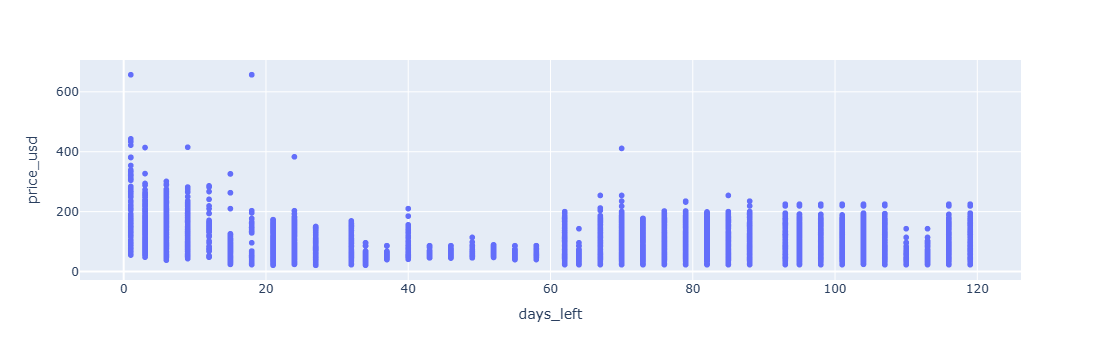

In [228]:
# Flight prices across different days left in scatterplot

fig = px.scatter(final_df, x="days_left", y="price_usd")
                # hover_data=['product_group', 'product_category', 'product_type'],
                # color='product_group')
fig.show()

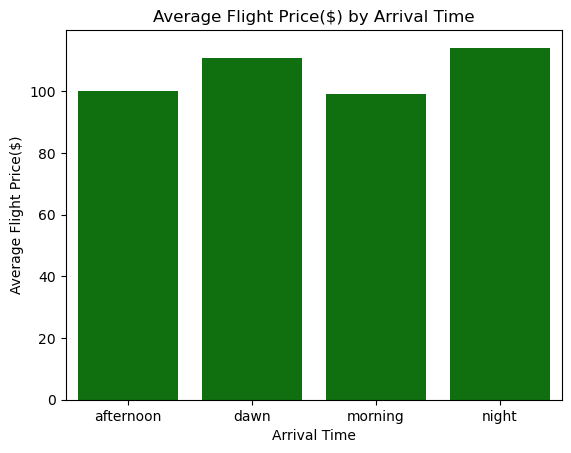

In [229]:
# Flight prices across different departure and arrival session 

price_groupby_arrival = final_df.groupby('arrival_session', as_index=False)['price_usd'].mean()

sns.barplot(x='arrival_session', y='price_usd', data=price_groupby_arrival, color = 'green')

# Adding labels and title
plt.xlabel("Arrival Time")  # Label for the x-axis
plt.ylabel("Average Flight Price($)")  # Label for the y-axis
plt.title("Average Flight Price($) by Arrival Time")  # Title of the plot

# Display the plot
plt.show()

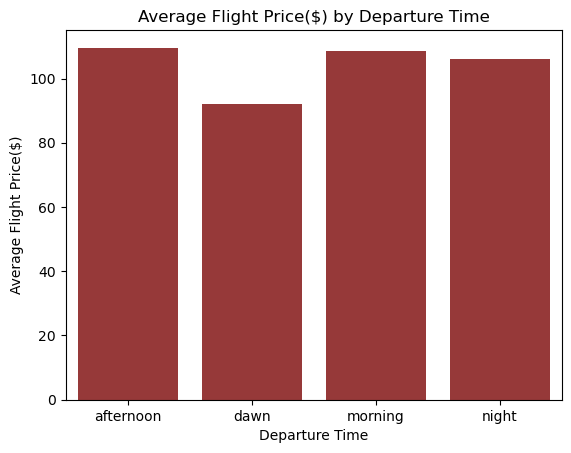

In [230]:
price_groupby_departure = final_df.groupby('dep_session', as_index=False)['price_usd'].mean()

sns.barplot(x='dep_session', y='price_usd', data=price_groupby_departure, color = 'brown')

# Adding labels and title
plt.xlabel("Departure Time")  # Label for the x-axis
plt.ylabel("Average Flight Price($)")  # Label for the y-axis
plt.title("Average Flight Price($) by Departure Time")  # Title of the plot

# Display the plot
plt.show()

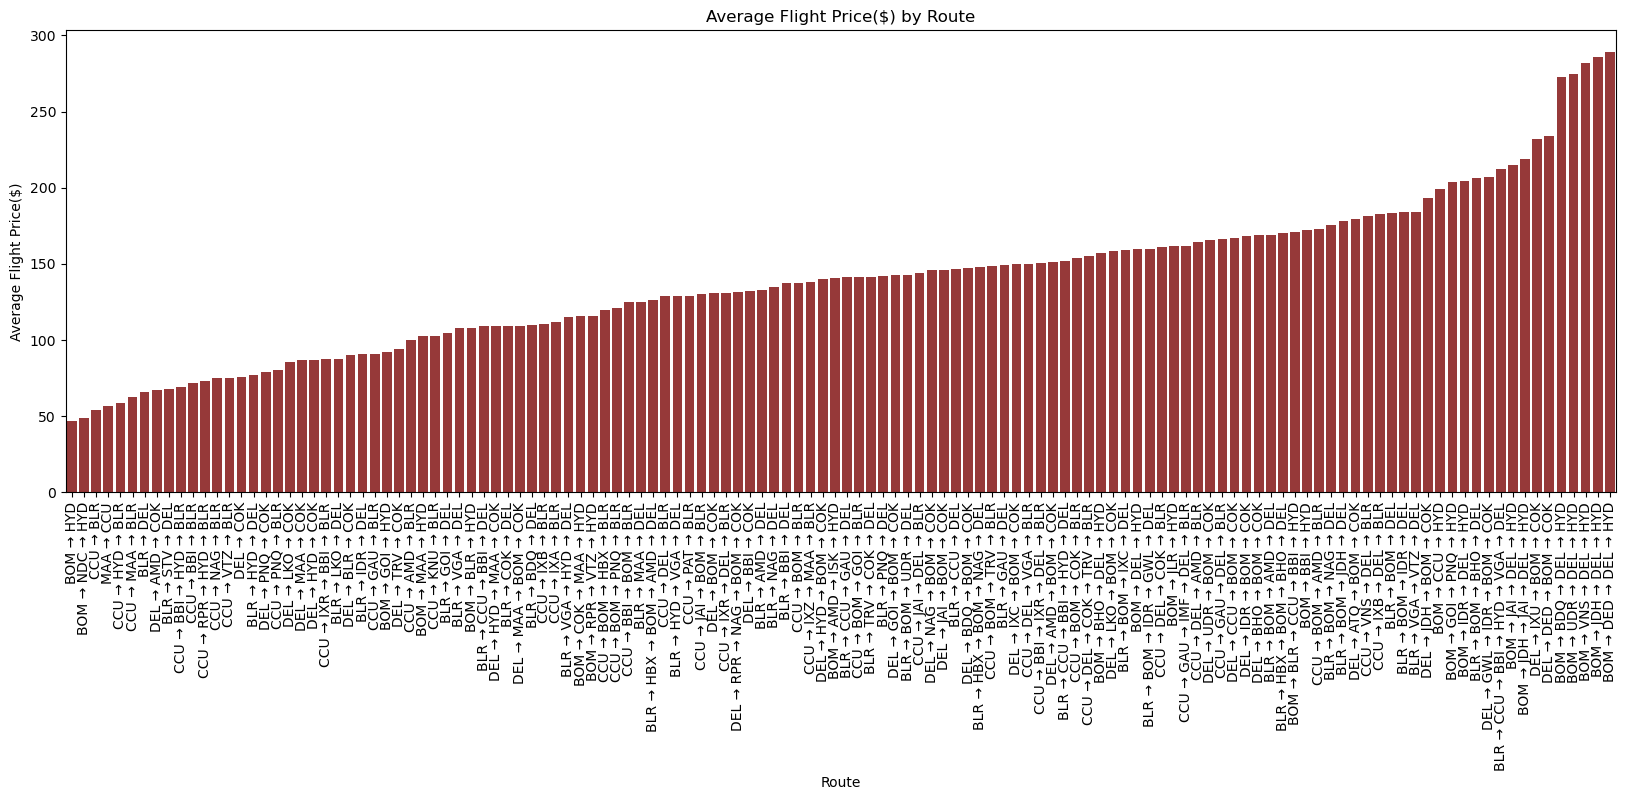

In [231]:
price_groupby_route = final_df.groupby('route', as_index=False)['price_usd'].mean().sort_values(by='price_usd',ascending=True)

plt.figure(figsize=(20, 6)) 
sns.barplot(x='route', y='price_usd', data=price_groupby_route, color = 'brown')

# Adding labels and title
plt.xlabel("Route")  # Label for the x-axis
plt.ylabel("Average Flight Price($)")  # Label for the y-axis
plt.title("Average Flight Price($) by Route")  # Title of the plot
plt.xticks(rotation=90) 

# Display the plot
plt.show()

### Step 5 - Convert to dummies for categorical columns: airline, source, destination, route, dep_session

In [233]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10438 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   airline                10438 non-null  object        
 1   date_of_journey        10438 non-null  datetime64[ns]
 2   source                 10438 non-null  object        
 3   destination            10438 non-null  object        
 4   route                  10438 non-null  object        
 5   total_stops            10438 non-null  int64         
 6   staff                  10438 non-null  int64         
 7   fleet                  10438 non-null  float64       
 8   airbus a320-200        10438 non-null  float64       
 9   airbus a320neo         10438 non-null  float64       
 10  airbus a321neo         10438 non-null  float64       
 11  boeing 737-800         10438 non-null  int64         
 12  boeing 777-200/300     10438 non-null  int64         
 13  boeing

In [234]:
# model 1

# 'airline', 'source', 'destination', 'route','total_stops','month', 'day', 'days_left',  
# 'inflight_meal', 'checked_in_luggage', 'dep_session', 'arrival_session', 'day_of_week', 'duration_in_hours'

# model 2 - add on

# 'staff', 'fleet', 'airbus a320-200', 'airbus a320neo','airbus a321neo', 'boeing 737-800', 'boeing 777-200/300',
# 'boeing 787 dreamliner', 'boeing 737 max', 'bombardier q400','atr 72-500/600', 'skytrax_rating'

In [235]:
# Convert to dummies for categorical columns: 'airline', 'source', 'destination', 'dep_session'

In [236]:
airline_dummies = pd.get_dummies(final_df.airline, prefix='airline',drop_first=True)
source_dummies = pd.get_dummies(final_df.source, prefix='source',drop_first=True)
destination_dummies = pd.get_dummies(final_df.destination, prefix='destination',drop_first=True)
dep_session_dummies = pd.get_dummies(final_df.dep_session, prefix='dep_session',drop_first=True)
arr_session_dummies = pd.get_dummies(final_df.arrival_session, prefix='arr_session',drop_first=True)

In [237]:
route_dummies = pd.get_dummies(final_df.route, prefix='route',drop_first=True)

In [238]:
final_df_dummies = pd.concat([final_df, airline_dummies,source_dummies,destination_dummies,dep_session_dummies,arr_session_dummies, route_dummies], axis=1)

In [239]:
final_df_dummies = final_df_dummies.drop(['airline', 'date_of_journey', 'source', 'destination', \
                                          'route','arrival_session','dep_session'], axis=1)
final_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10438 entries, 0 to 10682
Columns: 171 entries, total_stops to route_MAA → CCU
dtypes: bool(150), float64(7), int32(7), int64(7)
memory usage: 3.0 MB


In [240]:
list_corr = list(final_df_dummies.columns)
list_corr

['total_stops',
 'staff',
 'fleet',
 'airbus a320-200',
 'airbus a320neo',
 'airbus a321neo',
 'boeing 737-800',
 'boeing 777-200/300',
 'boeing 787 dreamliner',
 'boeing 737 max',
 'bombardier q400',
 'atr 72-500/600',
 'month',
 'day',
 'days_left',
 'skytrax_rating',
 'inflight_meal',
 'checked_in_luggage',
 'day_of_week',
 'price_usd',
 'duration_in_hours',
 'airline_Air India',
 'airline_GoAir',
 'airline_IndiGo',
 'airline_Jet Airways',
 'airline_Multiple carriers',
 'airline_SpiceJet',
 'airline_Trujet',
 'airline_Vistara',
 'source_Chennai',
 'source_Delhi',
 'source_Kolkata',
 'source_Mumbai',
 'destination_Cochin',
 'destination_Delhi',
 'destination_Hyderabad',
 'destination_Kolkata',
 'destination_New Delhi',
 'dep_session_dawn',
 'dep_session_morning',
 'dep_session_night',
 'arr_session_dawn',
 'arr_session_morning',
 'arr_session_night',
 'route_BLR → BBI → DEL',
 'route_BLR → BDQ → DEL',
 'route_BLR → BOM → AMD → DEL',
 'route_BLR → BOM → BHO → DEL',
 'route_BLR → BOM →

In [241]:
final_df_dummies_corr = final_df_dummies[list_corr].corr() 

In [242]:
# Create positive correlation matrix and also filtering out strong negative correlations
corr_df = final_df_dummies_corr.abs()

In [243]:
# Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))

In [244]:
# Replacing the DataFrame with the mask where the mask has a True value in the upper triangle
corr_df = corr_df.mask(mask)
corr_df

,total_stops,staff,fleet,airbus a320-200,airbus a320neo,airbus a321neo,boeing 737-800,boeing 777-200/300,boeing 787 dreamliner,boeing 737 max,...,route_DEL → LKO → BOM → COK,route_DEL → LKO → COK,route_DEL → MAA → BOM → COK,route_DEL → MAA → COK,route_DEL → NAG → BOM → COK,route_DEL → PNQ → COK,route_DEL → RPR → NAG → BOM → COK,route_DEL → TRV → COK,route_DEL → UDR → BOM → COK,route_MAA → CCU
total_stops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
staff,0.005157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fleet,0.092536,0.864016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbus a320-200,0.034054,0.793892,0.889488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbus a320neo,0.229644,0.647694,0.868824,0.833494,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
route_DEL → PNQ → COK,0.019056,0.008345,0.005586,0.061953,0.004020,0.005227,0.109032,0.056096,0.056096,0.148809,...,0.003991,0.002567,0.002064,0.007570,0.004135,NaN,NaN,NaN,NaN,NaN
route_DEL → RPR → NAG → BOM → COK,0.126185,0.020142,0.029594,0.024720,0.006287,0.024121,0.018813,0.078337,0.078337,0.012729,...,0.002382,0.001532,0.001232,0.004518,0.002468,0.002411,NaN,NaN,NaN,NaN
route_DEL → TRV → COK,0.011747,0.024583,0.034838,0.029821,0.004048,0.012604,0.011830,0.066474,0.066474,0.013147,...,0.002460,0.001583,0.001273,0.004667,0.002549,0.002490,0.001486,NaN,NaN,NaN
route_DEL → UDR → BOM → COK,0.075355,0.014271,0.010494,0.012929,0.013846,0.026427,0.014340,0.054065,0.054065,0.013946,...,0.002610,0.001679,0.001350,0.004950,0.002704,0.002642,0.001577,0.001628,NaN,NaN


In [245]:
# Finding columns that have correlation greater than 0.7 (which is our threshold)
to_drop = [column for column in corr_df.columns if any(corr_df[column] > 0.8)]
print(to_drop)

['staff', 'fleet', 'airbus a320-200', 'airbus a320neo', 'airbus a321neo', 'boeing 737-800', 'boeing 777-200/300', 'boeing 787 dreamliner', 'boeing 737 max', 'bombardier q400', 'atr 72-500/600', 'month', 'skytrax_rating', 'inflight_meal', 'airline_Trujet', 'source_Chennai', 'source_Delhi', 'source_Mumbai', 'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata']


In [246]:
list(final_df_dummies.columns)

['total_stops',
 'staff',
 'fleet',
 'airbus a320-200',
 'airbus a320neo',
 'airbus a321neo',
 'boeing 737-800',
 'boeing 777-200/300',
 'boeing 787 dreamliner',
 'boeing 737 max',
 'bombardier q400',
 'atr 72-500/600',
 'month',
 'day',
 'days_left',
 'skytrax_rating',
 'inflight_meal',
 'checked_in_luggage',
 'day_of_week',
 'price_usd',
 'duration_in_hours',
 'airline_Air India',
 'airline_GoAir',
 'airline_IndiGo',
 'airline_Jet Airways',
 'airline_Multiple carriers',
 'airline_SpiceJet',
 'airline_Trujet',
 'airline_Vistara',
 'source_Chennai',
 'source_Delhi',
 'source_Kolkata',
 'source_Mumbai',
 'destination_Cochin',
 'destination_Delhi',
 'destination_Hyderabad',
 'destination_Kolkata',
 'destination_New Delhi',
 'dep_session_dawn',
 'dep_session_morning',
 'dep_session_night',
 'arr_session_dawn',
 'arr_session_morning',
 'arr_session_night',
 'route_BLR → BBI → DEL',
 'route_BLR → BDQ → DEL',
 'route_BLR → BOM → AMD → DEL',
 'route_BLR → BOM → BHO → DEL',
 'route_BLR → BOM →

In [247]:
feature_columns = ['total_stops',
 #'fleet',
 'month',
 'day',
 'days_left',
 #'skytrax_rating',
 'inflight_meal',
 'checked_in_luggage',
 'day_of_week',
 'duration_in_hours',
 'airline_Air India',
 'airline_GoAir',
 'airline_IndiGo',
 'airline_Jet Airways',
 'airline_Multiple carriers',
 'airline_SpiceJet',
 'airline_Trujet',
 'airline_Vistara',
 'source_Chennai',
 'source_Delhi',
 'source_Kolkata',
 'source_Mumbai',
 'destination_Cochin',
 'destination_Delhi',
 'destination_Hyderabad',
 'destination_Kolkata',
 'destination_New Delhi',
 'dep_session_dawn',
 'dep_session_morning',
 'dep_session_night',
 'arr_session_dawn',
 'arr_session_morning',
 'arr_session_night'
    ]

In [248]:
feature_columns_1 = ['total_stops',                 
 'fleet',
 'month',
 'day',
 'days_left',
 'skytrax_rating',
 'inflight_meal',
 'checked_in_luggage',
 'day_of_week',
 'duration_in_hours',
 'airline_Air India',
 'airline_GoAir',
 'airline_IndiGo',
 'airline_Jet Airways',
 'airline_Multiple carriers',
 'airline_SpiceJet',
 'airline_Trujet',
 'airline_Vistara',
 'source_Chennai',
 'source_Delhi',
 'source_Kolkata',
 'source_Mumbai',
 'destination_Cochin',
 'destination_Delhi',
 'destination_Hyderabad',
 'destination_Kolkata',
 'destination_New Delhi',
 'dep_session_dawn',
 'dep_session_morning',
 'dep_session_night',
 'arr_session_dawn',
 'arr_session_morning',
 'arr_session_night'
 ]


### Step 6 - Modeling - Using Linear Regression

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [251]:
def linreg_model(df, feature_cols):
    X = df[feature_cols]
    y = df['price_usd']

    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123) #it will give you 4 outputs

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_pred = linreg.predict(X_test)

    # Perform 5-fold cross-validation
    cross_val = cross_val_score(linreg, X ,y ,cv=5)
    cv_mean = cross_val.mean()
    
    # Create your scatter plot
    plt.plot(y_test, y_pred, 'o', markersize=6, label='Data Points', color='blue')

    # Fit a line to the data
    m, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, m*y_test + b, color='red', label=f'Fit: y = {m:.2f}x + {b:.2f}')

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.2)

    # Add labels and title
    plt.xlabel('Actual Flight Price', fontsize=12)
    plt.ylabel('Predicted Flight Price', fontsize=12)
    plt.title('Actual vs Predicted Flight Price', fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()
   
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
    print('R2 Score:', round(metrics.r2_score(y_test, y_pred),4))
    print("CV scores :",cross_val)
    print("CV mean :",round(cv_mean,2))
    print(linreg.coef_)
    print(linreg.intercept_)
    print(list(zip(feature_cols, linreg.coef_)))

### Model 1 - Linear Regression

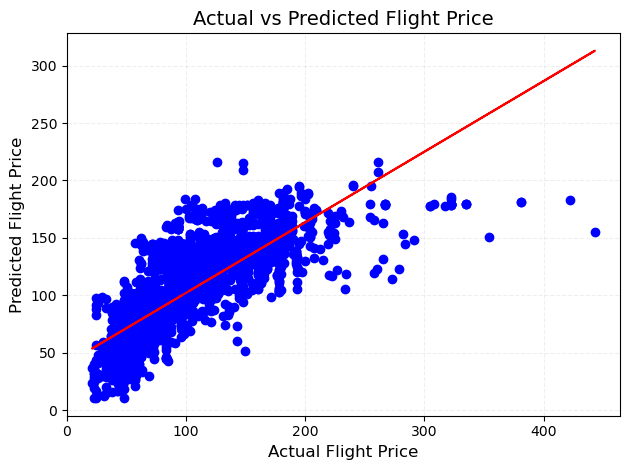

RMSE: 33.51
R2 Score: 0.6112
CV scores : [0.5910597  0.61641864 0.60634338 0.60172895 0.61481799]
CV mean : 0.61
[ 2.13566272e+01  7.82510198e+02  1.78326925e+02 -8.01763158e+02
  9.82898035e+12 -4.62706195e+12  2.80484883e+00 -1.32588776e-01
 -5.52452956e+12 -1.47699690e-01  3.67825802e+12  2.54718305e+01
  1.29506015e+01  2.48084364e+12 -3.87587847e-01 -3.13497120e+12
  1.99141267e+12  3.05220065e+12  5.42634858e+12  1.24540116e+12
  2.94985486e+12  3.88724592e+12  1.80500495e+12  3.21002154e+11
  3.40491317e+12 -5.66243031e-01 -2.26415789e+00 -1.12910472e+00
  8.20798142e-01  3.50137571e-01  6.34887363e-01]
107.7246008931488
[('total_stops', 21.356627198937613), ('month', 782.5101976952795), ('day', 178.32692464915203), ('days_left', -801.7631576123853), ('inflight_meal', 9828980349746.426), ('checked_in_luggage', -4627061952437.745), ('day_of_week', 2.804848826201675), ('duration_in_hours', -0.1325887756277289), ('airline_Air India', -5524529560546.754), ('airline_GoAir', -0.147699

In [253]:
linreg_model(final_df_dummies, feature_columns)

### Model 2 - Linear Regression (Add fleet & skytrax rating)

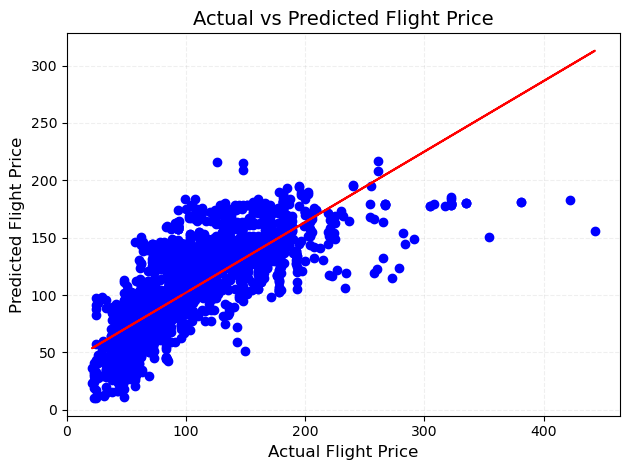

RMSE: 33.5
R2 Score: 0.6115
CV scores : [0.5910597  0.61645758 0.60634338 0.60172895 0.61481799]
CV mean : 0.61
[ 2.13450381e+01  6.17266962e+13  7.66869536e+02  1.74562389e+02
 -7.85950030e+02  8.47761819e+13 -2.90884525e+14  5.65496361e+13
  2.79927877e+00 -1.62060314e-01  1.69772959e+14 -4.05275942e+12
 -1.23472176e+14 -2.87623227e+13 -1.74868044e+13 -4.70092996e+13
  2.70847542e+11  3.89891597e+13 -1.19403357e+13  2.00268832e+14
  5.83729814e+13  3.12625676e+13 -1.35702786e+14  4.18163578e+13
  1.55163457e+12  3.68157276e+13  3.66277488e+13 -5.97903205e-01
 -2.26432845e+00 -1.19284749e+00  9.30953084e-01  3.85151514e-01
  6.72058702e-01]
107.74310245194988
[('total_stops', 21.3450381289291), ('fleet', 61726696237151.516), ('month', 766.8695362253605), ('day', 174.56238948294538), ('days_left', -785.9500298009301), ('skytrax_rating', 84776181900379.12), ('inflight_meal', -290884524848525.0), ('checked_in_luggage', 56549636097468.37), ('day_of_week', 2.799278767065096), ('duration_in

In [255]:
linreg_model(final_df_dummies, feature_columns_1)

### Step 6 - Exploring Other Models

In [257]:
!pip install catboost
!pip install xgboost

In [258]:
# random forest
# gradient boosting
# cat boost

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import catboost as cb

In [259]:
def other_models(df, feature_cols, model):
    X = df[feature_cols]
    y = df['price_usd']

    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123) #it will give you 4 outputs

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    linreg = model
    linreg.fit(X_train, y_train)

    y_pred = linreg.predict(X_test)

    # Perform 5-fold cross-validation
    cross_val = cross_val_score(linreg, X ,y ,cv=5)
    cv_mean = cross_val.mean()

    # Create your scatter plot
    plt.plot(y_test, y_pred, 'o', markersize=6, label='Data Points', color='blue')

    # Fit a line to the data
    m, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, m*y_test + b, color='red', label=f'Fit: y = {m:.2f}x + {b:.2f}')

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.2)

    # Add labels and title
    plt.xlabel('Actual Flight Price', fontsize=12)
    plt.ylabel('Predicted Flight Price', fontsize=12)
    plt.title('Actual vs Predicted Flight Price', fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()
   
    print(f'{model}')
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
    print('R2 Score:', round(metrics.r2_score(y_test, y_pred),4))
    print("CV scores :",cross_val)
    print("CV mean :",round(cv_mean,2))
    #print(linreg.score(X_test,y_test))

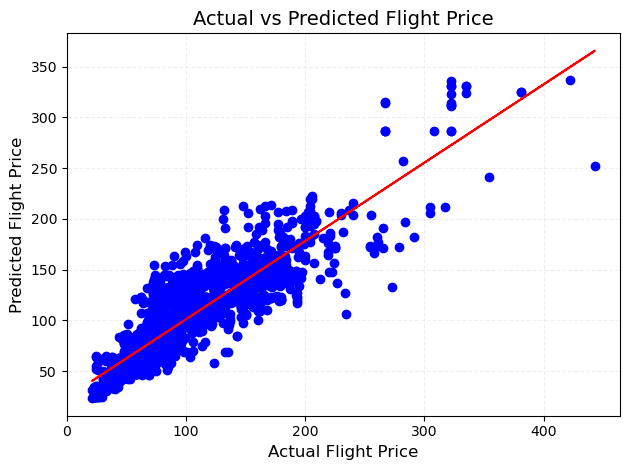

GradientBoostingRegressor()
RMSE: 24.24
R2 Score: 0.7966
CV scores : [0.76357038 0.75685364 0.79594771 0.77956496 0.76646454]
CV mean : 0.77


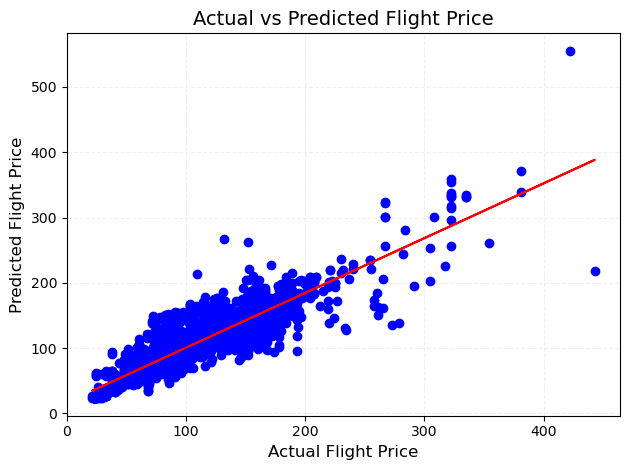

RandomForestRegressor()
RMSE: 23.74
R2 Score: 0.805
CV scores : [0.80486788 0.7637832  0.8122861  0.77897596 0.77995081]
CV mean : 0.79
Learning rate set to 0.056673
0:	learn: 51.6424001	total: 3.26ms	remaining: 3.26s
1:	learn: 49.8638319	total: 7.17ms	remaining: 3.58s
2:	learn: 48.1360925	total: 11.1ms	remaining: 3.68s
3:	learn: 46.5133099	total: 14.2ms	remaining: 3.54s
4:	learn: 45.1079648	total: 17.2ms	remaining: 3.43s
5:	learn: 43.6811247	total: 20.3ms	remaining: 3.37s
6:	learn: 42.4668102	total: 22.7ms	remaining: 3.22s
7:	learn: 41.3041349	total: 25.3ms	remaining: 3.14s
8:	learn: 40.2063154	total: 28ms	remaining: 3.08s
9:	learn: 39.1548568	total: 30.3ms	remaining: 2.99s
10:	learn: 38.2370256	total: 32.6ms	remaining: 2.93s
11:	learn: 37.3554332	total: 34.6ms	remaining: 2.85s
12:	learn: 36.5617209	total: 36.8ms	remaining: 2.8s
13:	learn: 35.8460087	total: 38.9ms	remaining: 2.74s
14:	learn: 35.1379931	total: 41.1ms	remaining: 2.7s
15:	learn: 34.4964332	total: 43.5ms	remaining: 2.67s


In [ ]:
ml_models = [GradientBoostingRegressor(),RandomForestRegressor(),CatBoostRegressor(), XGBRegressor()]

for x in ml_models:
    other_models(final_df_dummies, feature_columns_1, x)

In [ ]:
#use catboost model to plot

X = final_df_dummies[feature_columns_1]
y = final_df_dummies['price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123) #it will give you 4 outputs

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)
    
cb = CatBoostRegressor()
cb.fit(X_train, y_train)

y_pred = cb.predict(X)

cb_dataset = [X, y, y_pred]

# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('R2 Score:', metrics.r2_score(y_test, y_pred))


In [ ]:
y_pred

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns =['Predicted Flight Price']) 

In [ ]:
y_pred_df.to_csv('y_pred.csv')

In [ ]:
final_df_dummies['price_usd']

In [ ]:
cb_dataset = pd.concat([final_df_dummies[feature_columns_1], final_df_dummies['price_usd']], axis=1)

In [ ]:
cb_dataset

In [ ]:
cb_dataset.to_csv('cb_dataset.csv')

### Step 7 - Grid Search (Unsuccessful due to laptop capacity)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
feature_columns_2 = ['total_stops',                 
 #'fleet',
 'month',
 'day',
 'days_left',
 #'skytrax_rating',
 #'inflight_meal',
 #'checked_in_luggage',
 #'day_of_week',
 'duration_in_hours',
 # 'airline_Air India',
 # 'airline_GoAir',
 # 'airline_IndiGo',
 # 'airline_Jet Airways',
 # 'airline_Multiple carriers',
 # 'airline_SpiceJet',
 # 'airline_Trujet',
 # 'airline_Vistara',
 # 'source_Chennai',
 # 'source_Delhi',
 # 'source_Kolkata',
 # 'source_Mumbai',
 # 'destination_Cochin',
 # 'destination_Delhi',
 # 'destination_Hyderabad',
 # 'destination_Kolkata',
 # 'destination_New Delhi',
 # 'dep_session_dawn',
 # 'dep_session_morning',
 # 'dep_session_night',
 # 'arr_session_dawn',
 # 'arr_session_morning',
 # 'arr_session_night'
 ]

In [ ]:
X_1 = final_df_dummies[feature_columns_2]
y_1 = final_df_dummies['price_usd']

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X, y,random_state=123) #it will give you 4 outputs

scaler = StandardScaler()
X_1_train = scaler.fit_transform(X_1_train)
X_1_test = scaler.transform(X_1_test)
X = scaler.transform(X)
    
# cb = CatBoostRegressor()
# cb.fit(X_train, y_train)

# y_pred = cb.predict(X)

In [ ]:
# grid = {'iterations': [50, 200, 500],
#               'learning_rate': [0.01, 0.1],
#               'depth': [1,4, 9],
#               'l2_leaf_reg': [1,3, 5]}

In [ ]:
# catboost = CatBoostRegressor()
# grid_search = GridSearchCV(catboost, grid, cv=5)
# grid_search.fit(X_1_train, y_1_train)

In [ ]:
# best_params = grid_search.best_params_
# print(best_params)

In [ ]:
best_model = CatBoostRegressor(**best_params)
best_model.fit(X_1_train, y_1_train)
y_predf = best_model.predict(X_1_test)
r2 = r2_score(y_1_test, y_predf)
print(r2)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best mean squared error: ", grid_search.best_score_)
print("Features importance: ", grid_search.best_estimator_)
best_model = grid_search.best_estimator_
feature_importances = best_model.get_feature_importance(prettified=True)
feature_importances = pd.DataFrame(feature_importances)

In [ ]:
sns.barplot(data = feature_importances, x = feature_importances["Importances"], y = feature_importances["Feature Id"])